In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Inserting Our pre processed dataset.

In [2]:
df = pd.read_csv('output.csv')

In [3]:
df.head()

,Unnamed: 0,created_at,humidity,Temp,nh3,co,pm
0,0,2020-04-22 00:00:30 UTC,65.0,29.5,1189.44,0.31,107.72
1,1,2020-04-22 00:04:21 UTC,65.0,29.7,1181.09,0.30,114.37
2,2,2020-04-22 00:08:11 UTC,65.0,29.7,1169.99,0.30,114.37
3,3,2020-04-22 00:12:01 UTC,65.0,29.4,1164.44,0.29,106.06
4,4,2020-04-22 00:15:51 UTC,65.0,29.7,1164.44,0.28,100.24


As we can see, there are 7 columns inlcuding 'Unnamed : 0'. which is unnecessary. Lets drop this column.

In [4]:

df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [5]:
df.head()

,created_at,humidity,Temp,nh3,co,pm
0,2020-04-22 00:00:30 UTC,65.0,29.5,1189.44,0.31,107.72
1,2020-04-22 00:04:21 UTC,65.0,29.7,1181.09,0.30,114.37
2,2020-04-22 00:08:11 UTC,65.0,29.7,1169.99,0.30,114.37
3,2020-04-22 00:12:01 UTC,65.0,29.4,1164.44,0.29,106.06
4,2020-04-22 00:15:51 UTC,65.0,29.7,1164.44,0.28,100.24


Now it looks good. we have all necessarry data.

In [6]:
df.describe()

,humidity,Temp,nh3,co,pm
count,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000
mean,66.061639,29.788476,917.152519,0.355475,117.194280
std,4.098606,1.457198,196.450754,0.125554,26.134905
min,50.000000,23.800000,569.820000,0.050000,33.770000
25%,64.000000,29.200000,767.440000,0.280000,97.750000
50%,66.000000,30.200000,871.760000,0.350000,115.200000
75%,69.000000,30.700000,1062.340000,0.420000,135.140000
max,95.000000,44.900000,1937.610000,1.730000,267.250000


The data describe shows there are 2612 rows.and there range is not same,there mean,std is cartaile value, all are higly varience.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  2612 non-null   object 
 1   humidity    2612 non-null   float64
 2   Temp        2612 non-null   float64
 3   nh3         2612 non-null   float64
 4   co          2612 non-null   float64
 5   pm          2612 non-null   float64
dtypes: float64(5), object(1)
memory usage: 122.6+ KB


Except the 'Created_at' columns , all data types are float. That we want

In [8]:
import seaborn as sns

Let's see the correlation

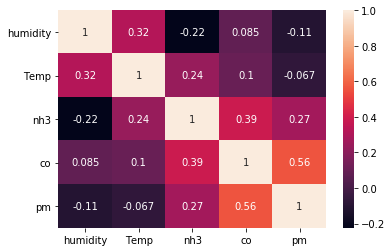

In [9]:
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

As we can see they are not highyly correlated with each other. Let's see the pairplot.

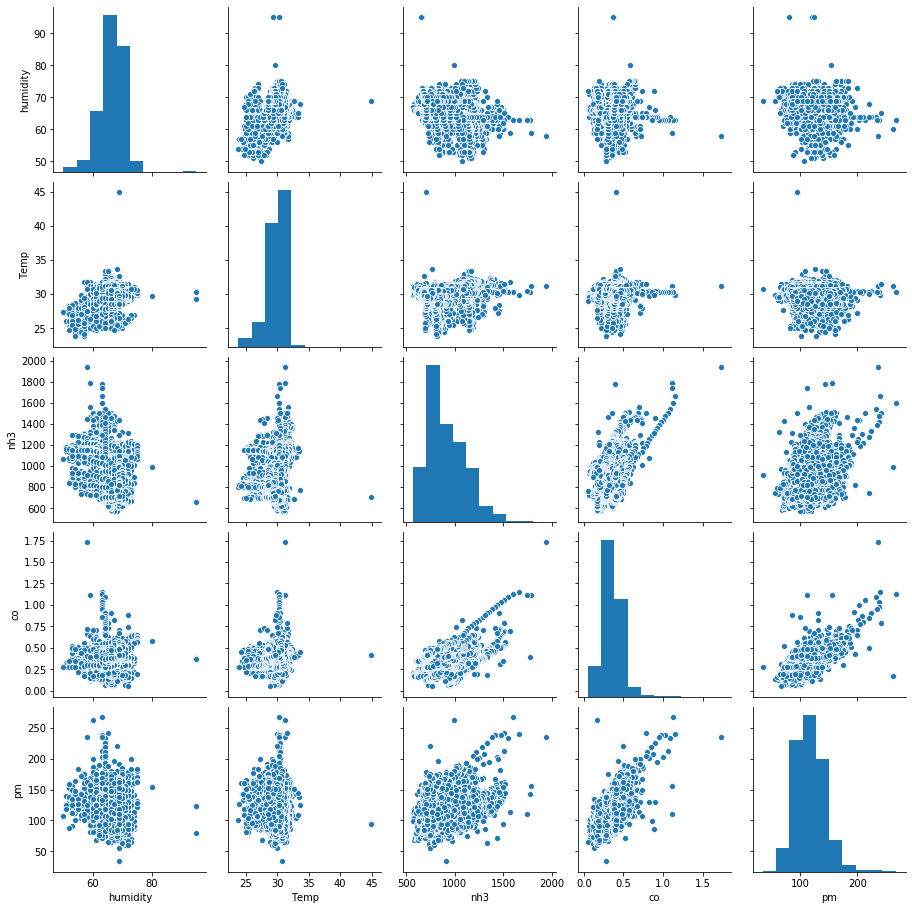

In [10]:
sns.pairplot(df)

Let's plot time series data individully. Firsly week with humidity
There are 2612 rows, which is a lot of data with 3+ minutes intervel .which doesn't make sence.We want to predict all the parameters in one hour intervel. lets recreate hour daaset.

In [11]:
df.set_index(['created_at'],inplace =True, drop = True)
df.index = pd.to_datetime(df.index)
jf = df.resample('H', label='right', closed='right').mean()
jf.dropna(inplace = True)
jf.head()

,humidity,Temp,nh3,co,pm
created_at,,,,,
2020-04-22 01:00:00+00:00,65.5000,29.72500,1150.091250,0.270625,107.878125
2020-04-22 02:00:00+00:00,65.7500,29.88125,1085.395625,0.204375,97.180000
2020-04-22 03:00:00+00:00,65.0000,30.38000,1041.246667,0.166000,93.374000
2020-04-22 04:00:00+00:00,65.3125,29.96250,962.865000,0.085000,85.547500
2020-04-22 05:00:00+00:00,65.6000,30.24000,979.563333,0.110667,96.645333


All done. We have succefully rebuiild the dataset with one hour intervel.

In [12]:
jf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2020-04-22 01:00:00+00:00 to 2020-04-29 00:00:00+00:00
Freq: H
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   humidity  168 non-null    float64
 1   Temp      168 non-null    float64
 2   nh3       168 non-null    float64
 3   co        168 non-null    float64
 4   pm        168 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


Now we have all 7 days data with one hour intervel. so our target is now, train first six days data and forecast the final day data.

In [13]:
# Create Training and Test
def split_data(data):
  train = data[:144]
  test = data[144:]
  return train, test

In [14]:
train_humidity, test_humidity = split_data(jf.humidity)
train_pm,test_pm = split_data(jf.pm)
train_co,test_co = split_data(jf.co)
train_temp,test_temp = split_data(jf.Temp)
train_nh3,test_nh3 = split_data(jf.nh3) 
len(test_co)

24

Now we have to test all the parameters to check wheather it's stationay or not using ADF test

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

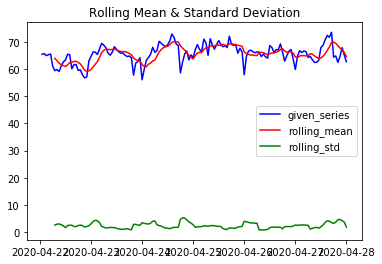

Results of Dickey-Fuller Test:
Test Statistic                  -4.951479
p-value                          0.000028
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [16]:
test_for_stationary(train_humidity) 

According to dicky fuller test, Test stat is less than critical value. and p-values also significantly smaller than 0.05.Now let's test pm


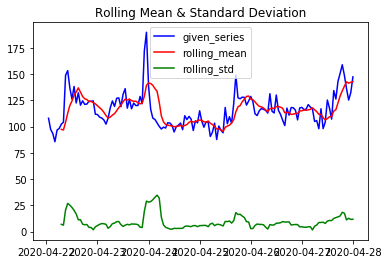

Results of Dickey-Fuller Test:
Test Statistic                  -4.519829
p-value                          0.000181
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [17]:
test_for_stationary(train_pm)

Looks good.lets look over co.

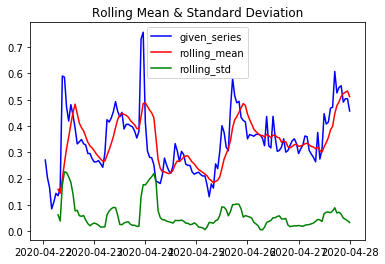

Results of Dickey-Fuller Test:
Test Statistic                  -4.002955
p-value                          0.001395
#Lags Used                       5.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [18]:
test_for_stationary(train_co)

This is also looks good. lets look over Nh3

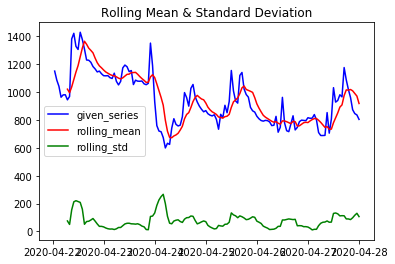

Results of Dickey-Fuller Test:
Test Statistic                  -2.671958
p-value                          0.079018
#Lags Used                       5.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [19]:
test_for_stationary(train_nh3)

Here is it.Nh3, which is not statinary at all.the p value is greater than the threshold,test stat is also greater than the critical value.
we have to make it non stationary using log transformed or other method.before make it stationary , lets test tempereture.

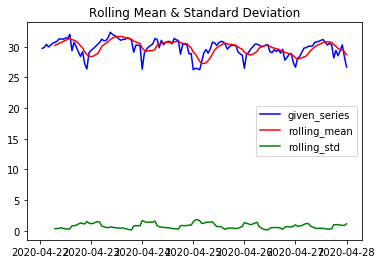

Results of Dickey-Fuller Test:
Test Statistic                  -3.868655
p-value                          0.002278
#Lags Used                       4.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [20]:
test_for_stationary(train_temp)

it looks good. But Critical value is almost equal to test stat. which is not good. but okay for. Later on we will tune the parameter. Then , if need , we will change.For now lets apply log transform technique on nh3

In [21]:
def log_transformed(data):

  ts_logtransformed = np.log(data)
  plt.plot(ts_logtransformed)
  return ts_logtransformed



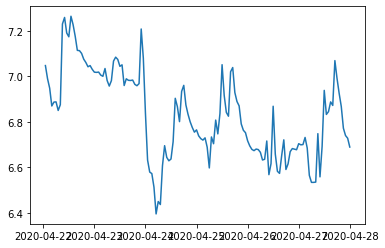

In [22]:
ts_logtransformed_nh3 = log_transformed(train_nh3)

Smooth it by rolling average

In [23]:
def rolling_avg(data):

  Rolling_average = data.rolling(window = 7, center= False).mean()
  plt.plot(data, label = 'Log Transformed')
  plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
  plt.legend(loc = 'best')
  return Rolling_average




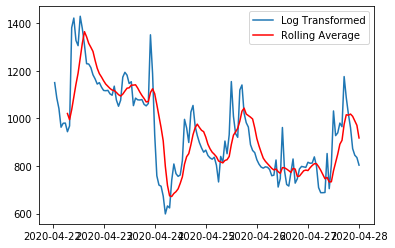

In [24]:
Rolling_average_nh3 = rolling_avg(train_nh3)

In [25]:
def log_rol_def(data1,data2):


  log_Rolling_difference = data1 - data2
  log_Rolling_difference.dropna(inplace=True)
  plt.plot(log_Rolling_difference)
  return log_Rolling_difference



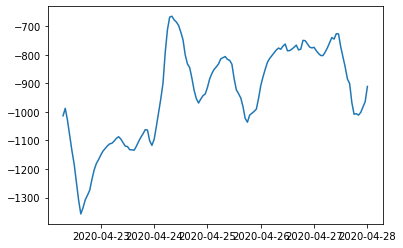

In [26]:
log_Rolling_diff_nh3 = log_rol_def(ts_logtransformed_nh3,Rolling_average_nh3)

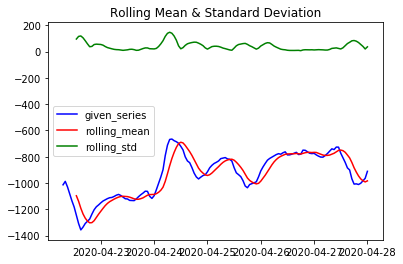

Results of Dickey-Fuller Test:
Test Statistic                  -1.927548
p-value                          0.319215
#Lags Used                      12.000000
Number of Observations Used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64


In [27]:
test_for_stationary(log_Rolling_diff_nh3)

It looks over differencing.the P value is greater than 0.05, and the critical value(1%) is also less than our test statistics. theoritically , now it is not stationary. lets apply log transformed method.

Now it looks cool.The critical value(1%) is greater than our test stat. which means , we are 99% sure that, our dataset is statioanry.P value is also very less than threshold.So we got out d term for Humidity which is 1.
Now it's time to check our P and q term using acf and pcf plot.

In [28]:
def diff_logtrans(data, n):


  ts_diff_logtrans = data - data.shift(n)
  plt.plot(ts_diff_logtrans)
  return ts_diff_logtrans

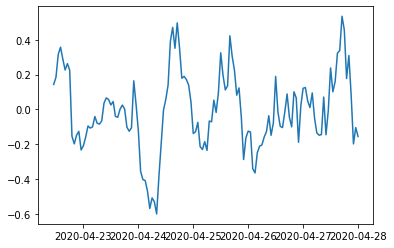

In [29]:
ts_diff_logtrans_nh3 = diff_logtrans(ts_logtransformed_nh3,10)

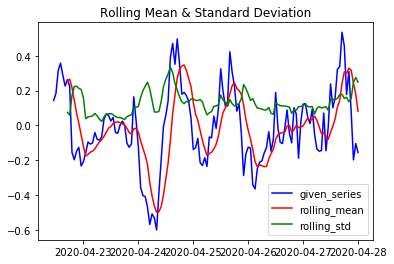

Results of Dickey-Fuller Test:
Test Statistic                  -2.934236
p-value                          0.041509
#Lags Used                      10.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [30]:
ts_diff_logtrans_nh3.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans_nh3)

A little change , but not up to the mar. lets apply differnecing.

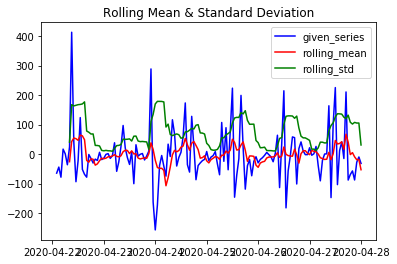

Results of Dickey-Fuller Test:
Test Statistic                -1.072528e+01
p-value                        3.076738e-19
#Lags Used                     1.000000e+00
Number of Observations Used    1.410000e+02
Critical Value (1%)           -3.477601e+00
Critical Value (5%)           -2.882266e+00
Critical Value (10%)          -2.577822e+00
dtype: float64


In [31]:
t_train_nh3 = train_nh3.diff()
#t_train_humidity = t_train_humidity.dropna(inplace=True)
test_for_stationary(t_train_nh3[1:])

Now it looks stationary. As we can see the test stat is lower than the critical value(1%) and also the p value is also less than 0.05(threshold)

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

def acf_pcf(data):

  pyplot.figure()
  pyplot.subplot(211)
  plot_acf(data, ax=pyplot.gca(),lags=40)
  pyplot.subplot(212)
  plot_pacf(data, ax=pyplot.gca(), lags=50)
  pyplot.show()

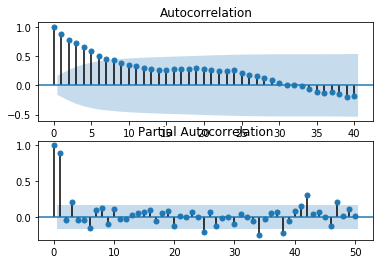

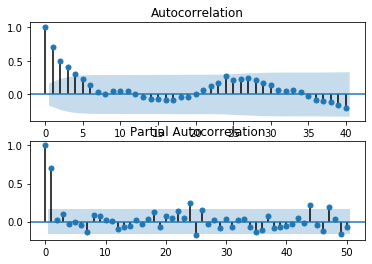

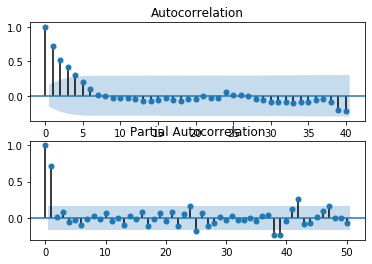

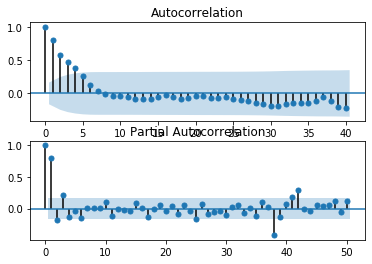

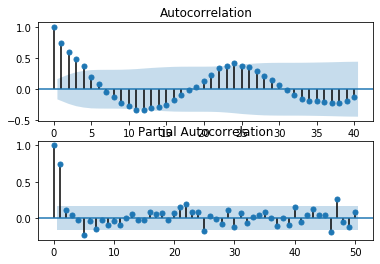

In [33]:
acf_pcf(train_nh3)
acf_pcf(train_humidity)
acf_pcf(train_pm)
acf_pcf(train_co)
acf_pcf(train_temp)

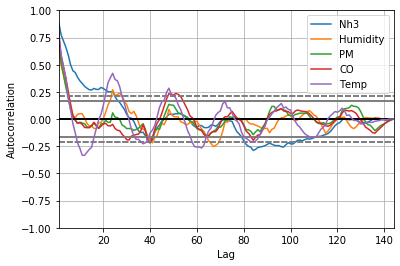

In [34]:
from pandas.plotting import autocorrelation_plot as acf

acf(train_nh3, label="Nh3")
acf(train_humidity, label = 'Humidity')
acf(train_pm, label = "PM")
acf(train_co, label = "CO")
acf(train_temp, label = "Temp")

This is the ACF and PACF plot of all the parameters. As we can see , in case Temperature , there is bit of seasonality. for this we can set the d=1 and tune other parameters (p,q). the lower the AIC,BIC the better the model.ACF,PACF just an assumption of p,Q. We need to tune the model and check which combination , gives us better accuracy.In case of that, we assumed , for CO, p,d,q =  1, 0, 2(ARMA), PM p,d,q=3,0,1 (ARMA) temp 5,1,1(ARIMA) humidity 1,1,1(ARIMA),nh3 p,d,q= 2,1,3(ARIMA)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
def arima (p,d,q,train):


  model = ARIMA(train, order=(p, d, q))  
  results_ARIMA = model.fit(trend= 'nc', disp=-1)  
  plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p = '+str(p)+','+'q = '+str(q))
  RSS =results_ARIMA.fittedvalues-train
  RSS.dropna(inplace=True)
  plt.title('RSS: %.4f'% sum(RSS**2))
  plt.legend(loc='best')
  return results_ARIMA,RSS 


                             ARIMA Model Results                              
Dep. Variable:                  D.nh3   No. Observations:                  143
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -833.759
Method:                       css-mle   S.D. of innovations             82.218
Date:                Tue, 19 May 2020   AIC                           1679.518
Time:                        12:45:11   BIC                           1697.295
Sample:                    04-22-2020   HQIC                          1686.742
                         - 04-28-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.nh3     0.8426      0.207      4.062      0.000       0.436       1.249
ar.L2.D.nh3    -0.7249      0.232     -3.119      0.002      -1.181      -0.269
ma.L1.D.nh3    -0.8306      0.228     -3.650    

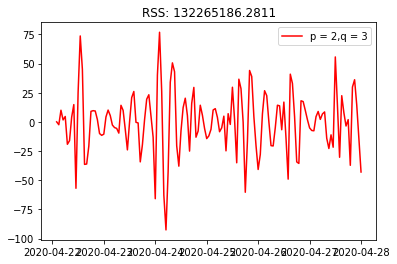

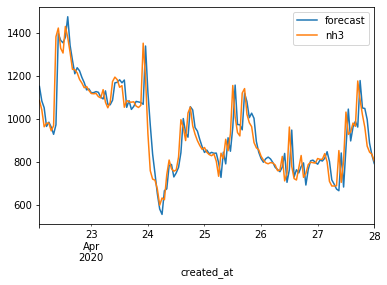

In [37]:
model_fit_nh3,rss_nh3=arima(2,1,3,train_nh3)
model_fit_nh3.plot_predict(dynamic= False)
print(model_fit_nh3.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.humidity   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -334.142
Method:                       css-mle   S.D. of innovations              2.492
Date:                Tue, 19 May 2020   AIC                            674.284
Time:                        12:45:12   BIC                            683.173
Sample:                    04-22-2020   HQIC                           677.896
                         - 04-28-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ar.L1.D.humidity     0.6739      0.076      8.855      0.000       0.525       0.823
ma.L1.D.humidity    -0.9707      0.031    -30.842      0.000      -1.032      -0.909
                            

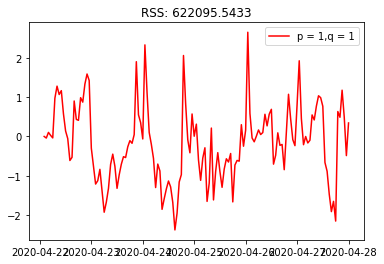

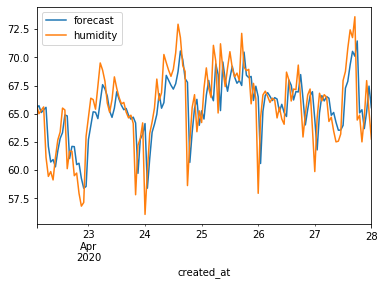

In [38]:
model_fit_humidity,rss_humidity=arima(1,1,1,train_humidity)
model_fit_humidity.plot_predict(dynamic= False)
print(model_fit_humidity.summary())

                              ARMA Model Results                              
Dep. Variable:                     co   No. Observations:                  144
Model:                     ARMA(1, 2)   Log Likelihood                 179.754
Method:                       css-mle   S.D. of innovations              0.069
Date:                Tue, 19 May 2020   AIC                           -351.508
Time:                        12:45:13   BIC                           -339.629
Sample:                    04-22-2020   HQIC                          -346.681
                         - 04-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.co       0.9906      0.009    104.497      0.000       0.972       1.009
ma.L1.co       0.0562      0.084      0.670      0.503      -0.108       0.221
ma.L2.co      -0.3286      0.083     -3.957      0.0

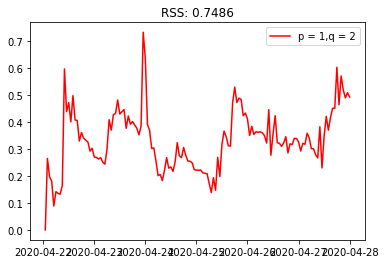

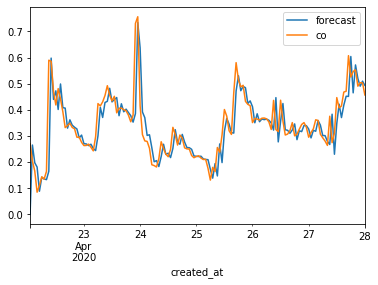

In [39]:

model_fit_co,rss_co = arima(1,0,2,train_co)

model_fit_co.plot_predict(dynamic= False)
print(model_fit_co.summary())

C:\Users\SansTana\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\SansTana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\SansTana\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\SansTana\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\SansTana\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                              ARMA Model Results                              
Dep. Variable:                     pm   No. Observations:                  144
Model:                     ARMA(3, 1)   Log Likelihood                -558.657
Method:                       css-mle   S.D. of innovations             11.223
Date:                Tue, 19 May 2020   AIC                           1127.314
Time:                        12:45:17   BIC                           1142.163
Sample:                    04-22-2020   HQIC                          1133.348
                         - 04-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.pm       1.7228   1.46e-05   1.18e+05      0.000       1.723       1.723
ar.L2.pm      -0.7059   7.94e-06  -8.89e+04      0.000      -0.706      -0.706
ar.L3.pm      -0.0168   9.83e-07  -1.71e+04      0.0

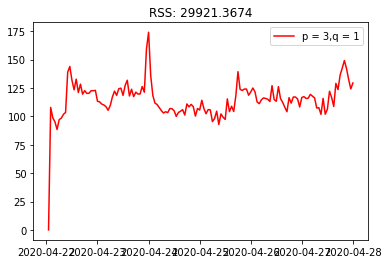

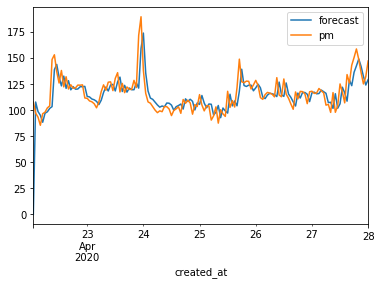

In [40]:
model_fit_pm,rss_pm = arima(3,0,1,train_pm)
model_fit_pm.plot_predict(dynamic= False)
print(model_fit_pm.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Temp   No. Observations:                  143
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -181.216
Method:                       css-mle   S.D. of innovations              0.854
Date:                Tue, 19 May 2020   AIC                            376.433
Time:                        12:45:17   BIC                            397.173
Sample:                    04-22-2020   HQIC                           384.860
                         - 04-28-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Temp     0.6714      0.084      8.004      0.000       0.507       0.836
ar.L2.D.Temp     0.0981      0.099      0.988      0.323      -0.097       0.293
ar.L3.D.Temp     0.0559      0.101      0.55

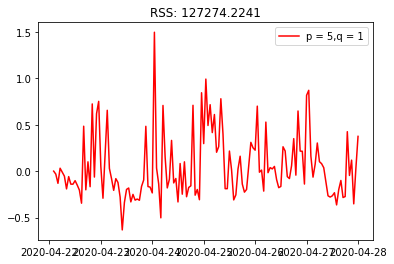

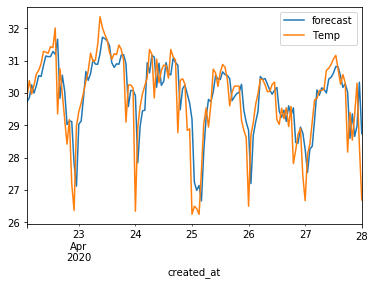

In [41]:
model_fit_temp,rss_temp= arima(5,1,1,train_temp)
model_fit_temp.plot_predict(dynamic= False)
print(model_fit_temp.summary())

In [42]:
def forecast(fitted,n,train,test,par):
    
    # Forecast
    fc, se, conf = fitted.forecast(n, alpha=0.05)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test_pm.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)
    
    
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals '+"("+par+")")
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    return fc_series




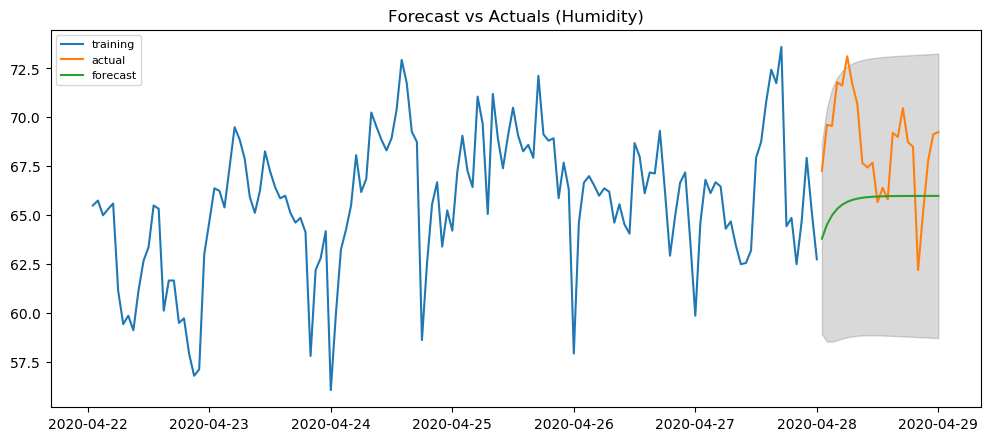

In [43]:

predicted_humidity = forecast(model_fit_humidity,24,train_humidity,test_humidity,"Humidity")


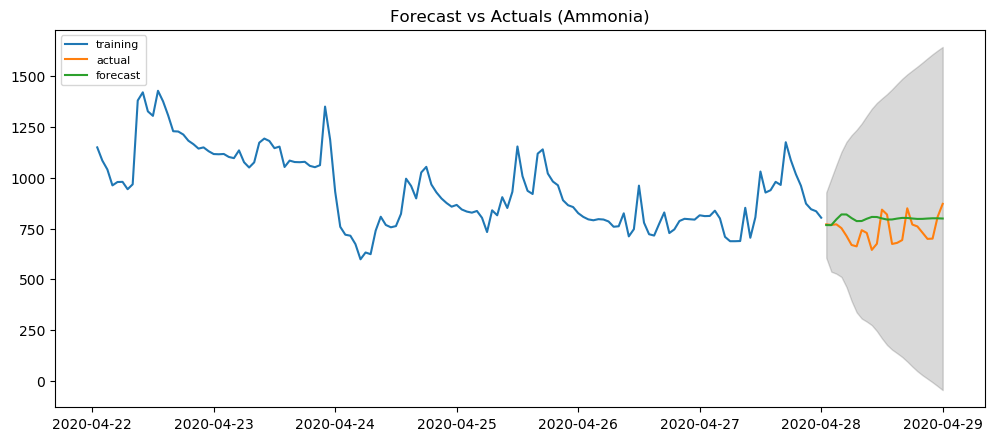

In [44]:
predicted_nh3 = forecast(model_fit_nh3,24,train_nh3,test_nh3, "Ammonia")


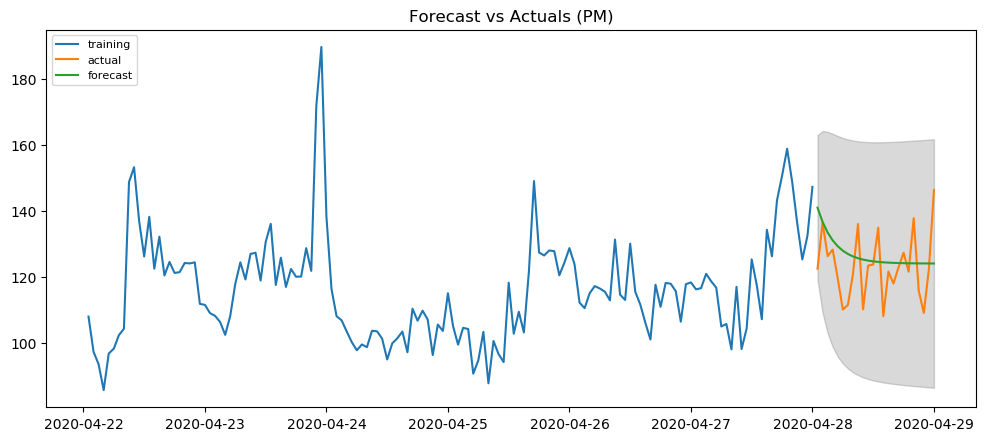

In [45]:
predicted_pm = forecast(model_fit_pm,24,train_pm,test_pm,"PM")

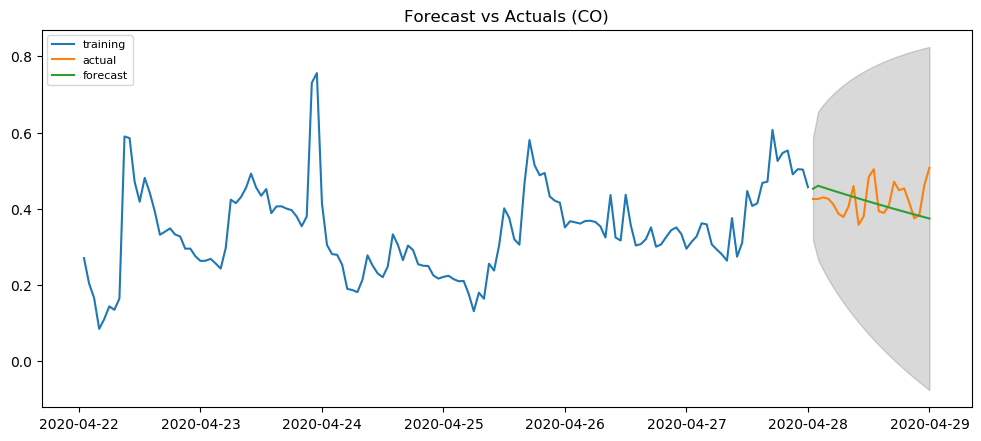

In [46]:
predicted_co = forecast(model_fit_co,24,train_co,test_co,"CO")

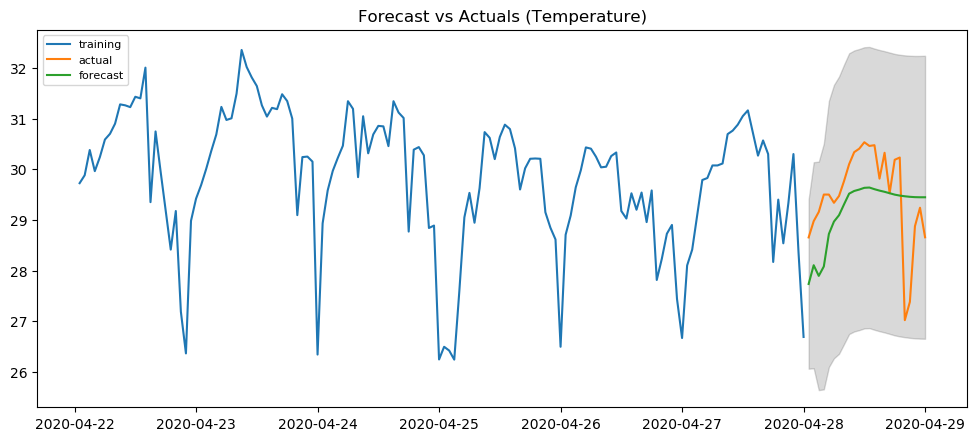

In [47]:
predicted_temp = forecast(model_fit_temp,24,train_temp,test_temp,"Temperature")

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    


    return np.mean(np.abs(y_pred - y_true)/np.abs(y_true))*100 



In [49]:
mape_humidity = mean_absolute_percentage_error(test_humidity,predicted_humidity)
print("Mape of humidity "+str(mape_humidity))

Mape of humidity 4.707046992663136


In [50]:
mape_nh3 = mean_absolute_percentage_error(test_nh3,predicted_nh3)
print("Mape of nh3 "+str(mape_nh3))

Mape of nh3 10.300505146224387


In [51]:
mape_co = mean_absolute_percentage_error(test_co,predicted_co)
print("Mape of CO "+str(mape_co))

Mape of CO 10.261755747403699


In [52]:
mape_temp = mean_absolute_percentage_error(test_temp,predicted_temp)
print("Mape of Temperature "+str(mape_temp))

Mape of Temperature 2.828668510031912


In [53]:
mape_pm = mean_absolute_percentage_error(test_pm,predicted_pm)
print("Mape of PM "+str(mape_pm))

Mape of PM 7.207788776412592


p=2, q=8